In [1]:
import numpy as np
import pandas as pd 
import scipy.sparse

In [2]:
# Load data
# test = pd.read_csv('../readonly/data_leakages_data/test_pairs.csv')
# test.head(10)

t1 = pd.read_csv('t1.csv')
t2 = pd.read_csv('t2.csv')
t3 = pd.read_csv('t3.csv')
t4 = pd.read_csv('t4.csv')

test = pd.concat([t1,t2,t3,t4])

In [3]:
import sklearn
import tqdm

from sklearn.neighbors import LocalOutlierFactor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.1.


In [4]:
print(test.shape)
print(test['pairId'].nunique())
print(test['FirstId'].nunique())
print(test['SecondId'].nunique())

(368550, 3)
368550
26325
26310


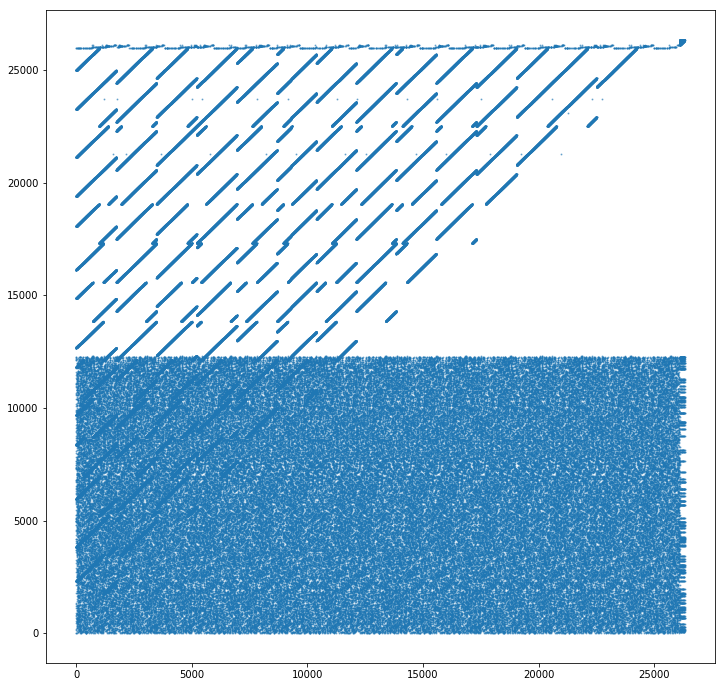

In [5]:
f, ax = plt.subplots(figsize=(12, 12))

plt.scatter(test['FirstId'], test['SecondId'], s=1, alpha=0.5)
plt.show()

In [6]:
_test = test.loc[(test['SecondId'] < 12300) & (test['FirstId'] < 12300)]

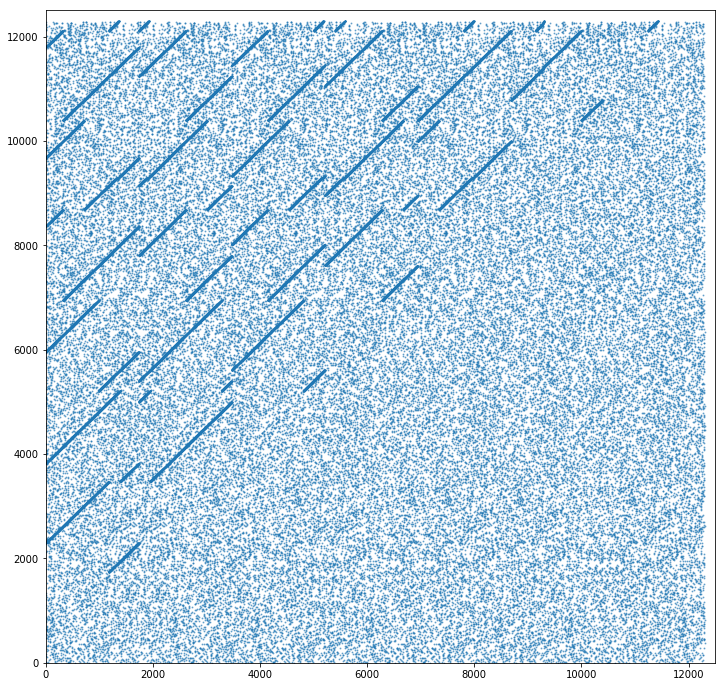

In [7]:
f, ax = plt.subplots(figsize=(12, 12))

plt.xlim((0, 12500))
plt.ylim((0, 12500))

plt.scatter(_test['FirstId'], _test['SecondId'], s=1, alpha=0.5)
plt.show()

 ### Warning
 If the sklearn's version is '0.20.1', LocalOutlierFactor will perform perfectly for this dataset.  
 If the sklearn's version is older than '0.20.1', LocalOutlierFactor maybe bad for this dataset

/ssd/virtualenv/tf-py3/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


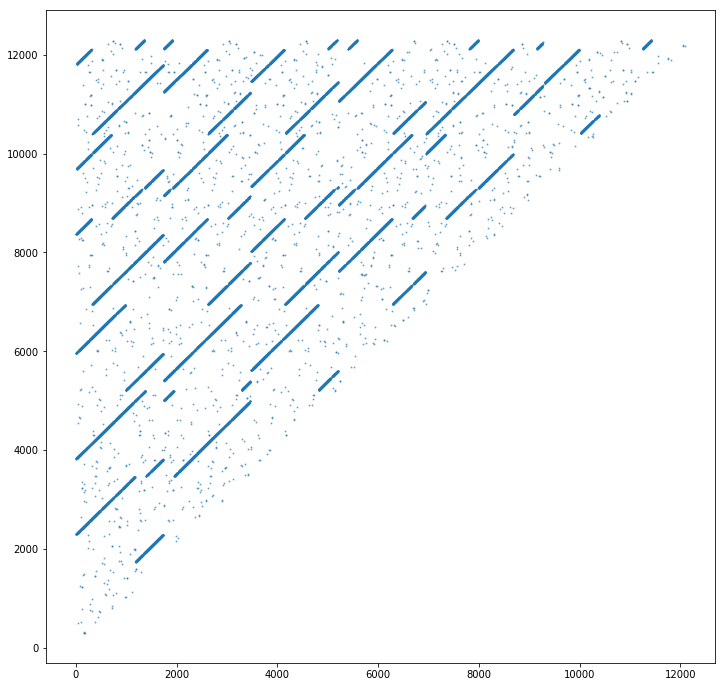

In [8]:
magic = _test.loc[(_test['FirstId'] < _test['SecondId'])]

outliers_fraction = 0.35
clf =  LocalOutlierFactor(n_neighbors=3, contamination=outliers_fraction)
for _ in range(0, 3):
    X = magic[['FirstId', 'SecondId']].values
    
    magic['y'] = clf.fit_predict(X)
    magic = magic.loc[(magic['y'] == 1)]

f, ax = plt.subplots(figsize=(12, 12))

plt.scatter(magic['FirstId'], magic['SecondId'], s=1, alpha=0.5)
plt.show()

In [9]:
my_submission = test.copy()
my_submission['Prediction'] = 0

my_submission = my_submission.merge(magic, on=['pairId', 'FirstId', 'SecondId'], how='left')

my_submission.loc[(my_submission['SecondId'] > 12300), 'Prediction'] = 1
my_submission.loc[(my_submission['y'] == 1), 'Prediction'] = 1

my_submission = my_submission[['pairId', 'Prediction']]
my_submission['pairId'].value_counts()
my_submission.to_csv('submission.csv', index=False)